In [ ]:
import matplotlib.pyplot as plt
import sys

import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
df=pd.read_csv('dataset_ejercicio_I_regresion_lineal.csv',sep=',',engine='python')

x=df[df.columns[0:1].values]#df['size']

y =df[df.columns[1:2].values]#df['price']

x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.1,shuffle=True, random_state=0)

In [ ]:
x_train=x_train['size'].tolist()
x_test=x_test['size'].tolist()
y_train=y_train['price'].tolist()
y_test=y_test['price'].tolist()

In [ ]:
def F(w, X, y):
	return sum((w * x - y)**2 for x, y in zip(X, y))/len(y)

In [ ]:
def dF(w, X, y):
	return sum(2*(w * x - y) * x for x, y in zip(X, y))/len(y)

In [ ]:
def print_line(points, w, iteration, line_color = None, line_style = 'dotted'):
	list_x = []
	list_y = []
	for index, tuple in enumerate(points):
		x = tuple[0]
		y = x * w
		list_x.append(x)
		list_y.append(y)
	ax1.text(x,y, iteration, horizontalalignment='right')
	ax1.plot(list_x, list_y, color = line_color, linestyle= line_style)

gradient = -1162.0
iteration 0: w = 0.01162, F(w) = 13.97
gradient = -562.1845384615385
iteration 1: w = 0.017241845384615387, F(w) = 3.952487831538461
gradient = -271.9892042041419
iteration 2: w = 0.019961737426656807, F(w) = 1.6076899289522626
gradient = -131.5904692186115
iteration 3: w = 0.02127764211884292, F(w) = 1.0588433579161511
gradient = -63.664481242342895
iteration 4: w = 0.02191428693126635, F(w) = 0.9303749051740825
gradient = -30.801365751824296
iteration 5: w = 0.022222300588784594, F(w) = 0.9003043094540717
gradient = -14.901937684315252
iteration 6: w = 0.02237131996562775, F(w) = 0.893265688628056
gradient = -7.2096720819615125
iteration 7: w = 0.022443416686447365, F(w) = 0.8916181594738711
gradient = -3.4880948122688986
iteration 8: w = 0.022478297634570054, F(w) = 0.8912325225172876
gradient = -1.6875671016742506
iteration 9: w = 0.022495173305586796, F(w) = 0.8911422565199272


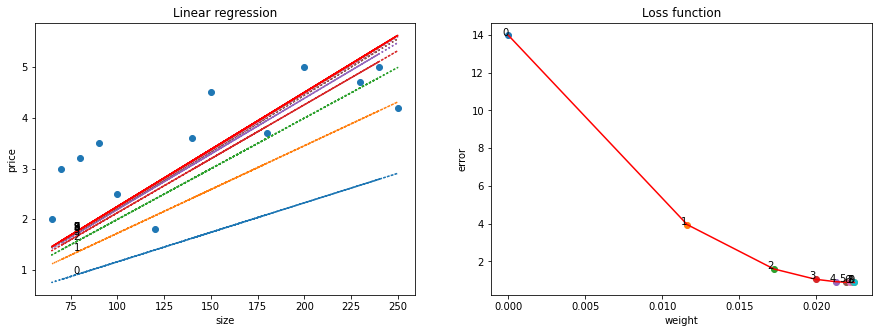

In [ ]:
if __name__=='__main__':
	X = x_train
	y = y_train
	list_error = []
	list_w = []	
	iterations = 10
	
	fig = plt.figure(figsize=(15, 5))
	ax1 = fig.add_subplot(1, 2, 1)
	ax1.set_title("Linear regression")
	ax1.set(xlabel="size", ylabel="price")
	ax2 = fig.add_subplot(1, 2, 2)
	ax2.set_title("Loss function")
	ax2.set(xlabel="weight", ylabel="error")
    
	ax1.scatter(X, y)
	
	w= 0
	alpha = 0.00001
	# ~ alpha = 0.05 #Efecto similar al de no sacar el promedio
	for t in range(iterations):
		error = F(w, X, y)
		gradient = dF(w, X, y)
		print ('gradient = {}'.format(gradient))
		ax2.scatter(w, error)
		ax2.text(w, error, t, horizontalalignment='right')
		list_w.append(w)
		list_error.append(error)
		
		w = w - alpha * gradient
		print ('iteration {}: w = {}, F(w) = {}'.format(t, w, error))
		print_line(zip(X, y), w, t)
			
	print_line(zip(X, y), w, t, 'red', 'solid')
	ax2.plot(list_w, list_error, color = 'red', linestyle = 'solid')
	
	plt.show()

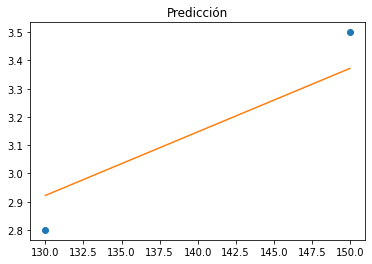

In [ ]:
list_x = []
list_y = []
for index, tuple in enumerate(zip(x_test, y_test)):
		x = tuple[0]
		y = x * list_w[iterations-1]
		list_x.append(x)
		list_y.append(y)
		plt.plot(list_x, list_y)
plt.scatter(x_test, y_test)
titulo="Predicción"
plt.title(titulo)
plt.show()

In [ ]:
# Imprimimos los resultados obtenidos
print('Resultados de la predicción:\n')

# Incorporamos los resultados obtenidos
print(f'{"Valor de x":12}   {"Valor de predicción":22}  {"Valor real de Y":20}  {"Valor del error en y":20}')
print('-------------------------------------------------------------------------------------')

ytest=[]
errorpred=[]
for i,t in enumerate(x_test):
  prediccion=list_w[iterations-1]*t
  ytest.append(prediccion)
  errorp=y_test[i]-ytest[i]
  errorpred.append(errorp)
  print('{0:7} {1:24} {2:15} {3:30}'.format(round(x_test[i],8), prediccion, y_test[i], errorpred[i]))

print("\nEl error del modelo es: " + str(F(list_w[iterations-1], x_test, y_test)))

Resultados de la predicción:

Valor de x     Valor de predicción     Valor real de Y       Valor del error en y
-------------------------------------------------------------------------------------
    150        3.371744645185508             3.5             0.1282553548144918
    130        2.922178692494107             2.8           -0.12217869249410729

El error del modelo es: 0.015688534469080407
